In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import norm

In [ ]:
df = pd.read_csv("/content/SocioDemografico.csv", sep=',')

In [ ]:
df.head()

,ID,Código del estudiante,Grupo,Trimestre al que corresponde la intervención,Escuela a la que pertenece,Etapa educativa del estudiante,Localidad,Fecha de nacimiento,Edad,Miembros en el hogar,Sexo
0,1,SJP932399,Experimental,III,Escuela Bilingüe Loma Colorada,III,Loma Colorada,11/20/2014,9,5,Masculino
1,2,SJP183846,Experimental,III,Escuela Bilingüe Loma Colorada,I,Loma Colorada,5/23/2017,6,4,Masculino
2,3,SJP646343,Experimental,III,Escuela Bilingüe Loma Colorada,VI,Loma Colorada,2/8/2011,12,7,Masculino
3,4,SJP686794,Experimental,III,Escuela Bilingüe Loma Colorada,III,Loma Colorada,9/11/2015,8,4,Femenino
4,5,SJP744954,Experimental,III,Escuela Bilingüe Loma Colorada,II,Loma Colorada,9/11/2016,7,4,Masculino


In [ ]:
df.fillna(0, inplace=True)

columns_to_convert = ['Edad', 'Miembros en el hogar']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

In [ ]:
for column in df.columns:
    print(f"Columna '{column}': {df[column].dtype}")

Columna 'ID': int64
Columna 'Código del estudiante': object
Columna 'Grupo': object
Columna 'Trimestre al que corresponde la intervención': object
Columna 'Escuela a la que pertenece': object
Columna 'Etapa educativa del estudiante': object
Columna 'Localidad': object
Columna 'Fecha de nacimiento': object
Columna 'Edad': int64
Columna 'Miembros en el hogar': int64
Columna 'Sexo': object


In [ ]:
print(df.columns)

Index(['ID', 'Código del estudiante', 'Grupo',
       'Trimestre al que corresponde la intervención',
       'Escuela a la que pertenece', 'Etapa educativa del estudiante',
       'Localidad', 'Fecha de nacimiento', 'Edad', 'Miembros en el hogar',
       'Sexo'],
      dtype='object')


In [ ]:

valores_nan = df['Edad'].isnull().sum()
if valores_nan > 0:
    print(f"Advertencia: Se encontraron {valores_nan} valores NaN en la columna 'Edad'.")
else:

    media_por_grupo = df.groupby('Grupo')['Edad'].mean()
    mediana_por_grupo = df.groupby('Grupo')['Edad'].median()


    print("Media por Grupo:")
    print(media_por_grupo)
    print("\nMediana por Grupo:")
    print(mediana_por_grupo)


Media por Grupo:
Grupo
Control          8.8
Experimental    10.3
Name: Edad, dtype: float64

Mediana por Grupo:
Grupo
Control          9.0
Experimental    10.5
Name: Edad, dtype: float64


<ipython-input-24-0640bf450bd8>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_experimental['Edad'], color='skyblue', shade=True, label='Densidad')


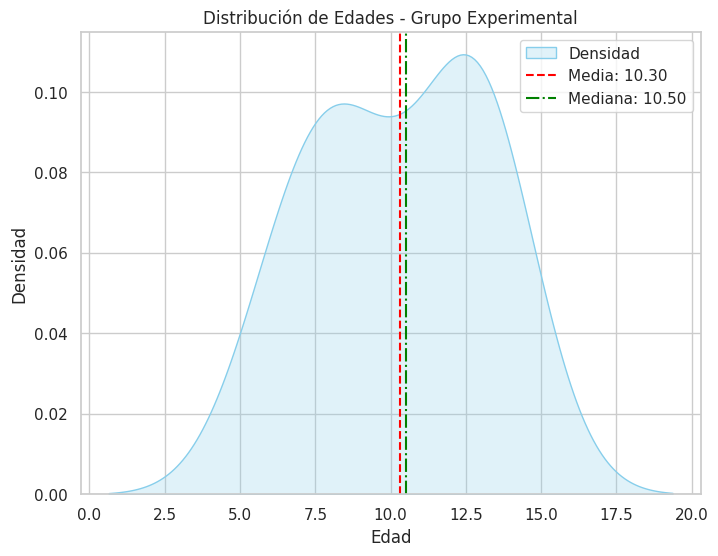

In [ ]:

df_experimental = df[df['Grupo'] == 'Experimental']

plt.figure(figsize=(8, 6))
sns.kdeplot(df_experimental['Edad'], color='skyblue', shade=True, label='Densidad')

media_experimental = df_experimental['Edad'].mean()
mediana_experimental = df_experimental['Edad'].median()

plt.axvline(media_experimental, color='red', linestyle='--', label=f'Media: {media_experimental:.2f}')
plt.axvline(mediana_experimental, color='green', linestyle='-.', label=f'Mediana: {mediana_experimental:.2f}')

plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución de Edades - Grupo Experimental')
plt.legend()

plt.show()


<ipython-input-25-5a511068c9b9>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_control['Edad'], color='orange', shade=True, label='Densidad')


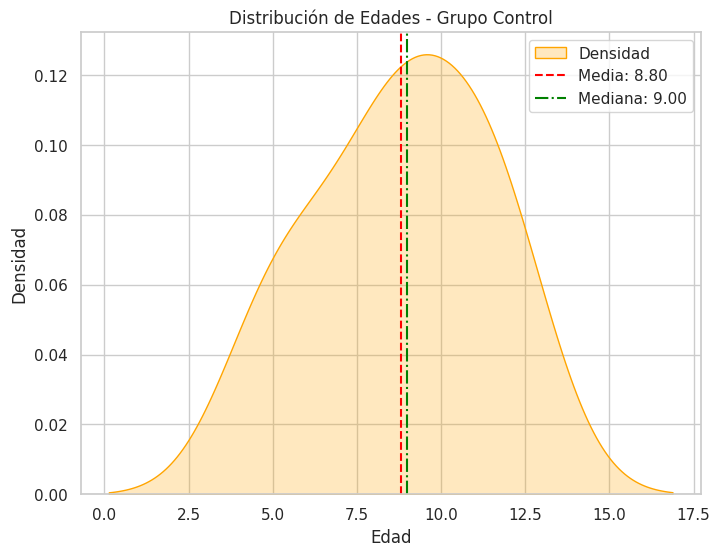

In [ ]:

df_control = df[df['Grupo'] == 'Control']

plt.figure(figsize=(8, 6))
sns.kdeplot(df_control['Edad'], color='orange', shade=True, label='Densidad')

media_control = df_control['Edad'].mean()
mediana_control = df_control['Edad'].median()

plt.axvline(media_control, color='red', linestyle='--', label=f'Media: {media_control:.2f}')
plt.axvline(mediana_control, color='green', linestyle='-.', label=f'Mediana: {mediana_control:.2f}')

plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución de Edades - Grupo Control')
plt.legend()

plt.show()


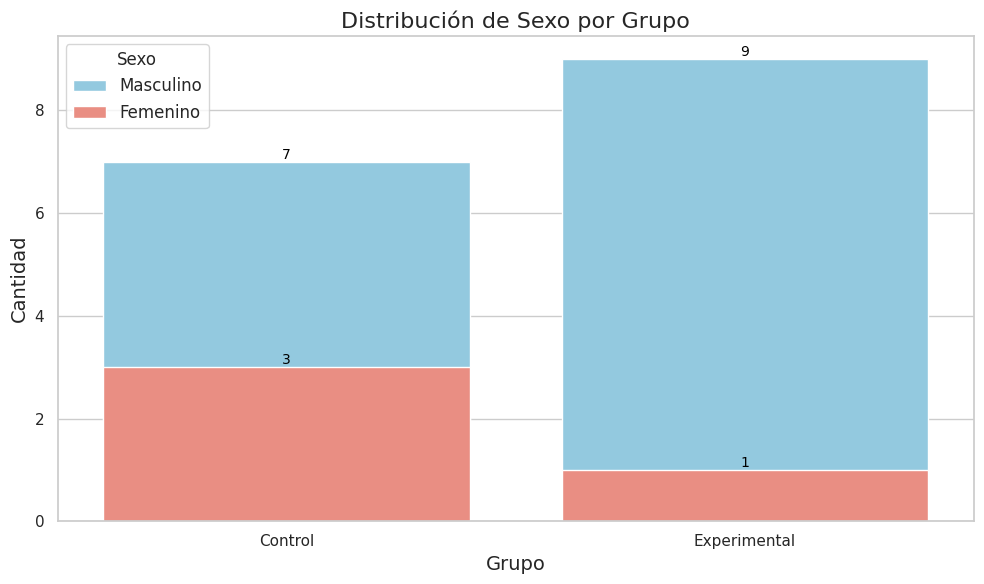

In [ ]:

sexo_por_grupo = df.groupby(['Grupo', 'Sexo']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.barplot(data=sexo_por_grupo.reset_index(), x='Grupo', y='Masculino', color='skyblue', label='Masculino')
sns.barplot(data=sexo_por_grupo.reset_index(), x='Grupo', y='Femenino', color='salmon', label='Femenino')

plt.title('Distribución de Sexo por Grupo', fontsize=16)
plt.xlabel('Grupo', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

plt.legend(title='Sexo', fontsize=12, title_fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()



In [ ]:
dA = pd.read_csv("/content/AspectosEducativos.csv", sep=',')

In [ ]:
dA.head()

,ID,Código del estudiante,Grupo,El estudiante tienen realizada la evaluación psicopedagógica o de su condición,¿ Cuál indican que es su condición ?,Comprensión del lenguaje verbal,Expresión verbal,Comprensión de conceptos abstractos,Vocabulario,Fluidez verbal,...,Habilidades de comunicación no verbal,Intereses y motivaciones comunicativas,Apoyo de comunicación,Coordinación motora gruesa,Equilibrio,Destreza motora fina,Coordinación ojo-mano,Manipulación de objetos,Comentarios adicionales: ¿hay algo más que te gustaría compartir sobre las habilidades motoras del niño?,Áreas/material
0,1,SJP932399,Experimental,Sí,Autismo y sindrome de Prader-Willi,Entiende instrucciones sencillas y conceptos b...,Utiliza palabras y frases de forma limitada o ...,Demuestra comprensión de conceptos abstractos ...,Utiliza un vocabulario limitado en su comunica...,Experimenta interrupciones o bloqueos ocasiona...,...,"Utiliza señales no verbales, como contacto vis...",Muestra interés en comunicarse y participar en...,"Utiliza apoyos de comunicación, como imágenes ...","El niño/a puede caminar, correr y saltar sin d...",El niño/a muestra dificultades ocasionales par...,El niño/a muestra cierta dificultad en activid...,El niño/a muestra cierta dificultad en la coor...,El niño/a muestra cierta dificultad al manipul...,NaN,Técnicas y Estrategias didácticas y metodológi...
1,2,SJP183846,Experimental,Sí,Autismo y cromosopía estructural.,Entiende instrucciones sencillas y conceptos b...,Produce palabras y frases de manera clara y co...,Tiene dificultades para comprender conceptos a...,Utiliza un vocabulario limitado en su comunica...,Mantiene una conversación fluida sin interrupc...,...,"Utiliza señales no verbales, como contacto vis...",Muestra interés en comunicarse y participar en...,"Utiliza apoyos de comunicación, como imágenes ...",El niño/a muestra cierta dificultad en activid...,El niño/a muestra dificultades ocasionales par...,El niño/a realiza actividades que requieren pr...,El niño/a muestra cierta dificultad en la coor...,El niño/a muestra cierta dificultad al manipul...,NaN,Técnicas y Estrategias didácticas y metodológi...
2,3,SJP646343,Experimental,Sí,Autismo y lento aprendizaje,Entiende instrucciones sencillas y conceptos b...,Produce palabras y frases de manera clara y co...,Demuestra comprensión de conceptos abstractos ...,Utiliza un vocabulario limitado en su comunica...,Mantiene una conversación fluida sin interrupc...,...,"Utiliza señales no verbales, como contacto vis...",Muestra interés en comunicarse y participar en...,"Utiliza apoyos de comunicación, como imágenes ...","El niño/a puede caminar, correr y saltar sin d...",El niño/a mantiene un buen equilibrio en difer...,El niño/a realiza actividades que requieren pr...,El niño/a muestra una buena coordinación entre...,El niño/a manipula objetos con facilidad y pre...,NaN,Técnicas y Estrategias didácticas y metodológi...
3,4,SJP686794,Experimental,Sí,Autismo,Entiende instrucciones sencillas y conceptos b...,Tiene dificultades significativas para expresa...,No muestra comprensión de conceptos abstractos.,Utiliza un vocabulario limitado en su comunica...,Experimenta interrupciones o bloqueos ocasiona...,...,No utiliza señales no verbales para comunicarse.,Muestra interés en comunicarse y participar en...,"Utiliza apoyos de comunicación, como imágenes ...","El niño/a puede caminar, correr y saltar sin d...",El niño/a mantiene un buen equilibrio en difer...,El niño/a realiza actividades que requieren pr...,El niño/a muestra una buena coordinación entre...,El niño/a manipula objetos con facilidad y pre...,NaN,Técnicas y Estrategias didácticas y metodológi...
4,5,SJP744954,Experimental,No,Autismo,Entiende instrucciones sencillas y conceptos b...,Produce palabras y frases de manera clara y co...,Demuestra comprensión de conceptos abstractos ...,Tiene un amplio y variado vocabulario receptiv...,Mantiene una conversación fluida sin interrupc...,...,Presenta limitaciones en el uso de señales no 

In [ ]:
for column in dA.columns:
    print(f"Columna '{column}': {dA[column].dtype}")

Columna 'ID': int64
Columna 'Código del estudiante': object
Columna 'Grupo': object
Columna 'El estudiante tienen realizada la evaluación psicopedagógica o de su condición': object
Columna '¿ Cuál indican que es su condición ?': object
Columna 'Comprensión del lenguaje verbal': object
Columna 'Expresión verbal': object
Columna 'Comprensión de conceptos abstractos': object
Columna 'Vocabulario': object
Columna 'Fluidez verbal': object
Columna 'Uso funcional del lenguaje': object
Columna 'Habilidades pragmáticas': object
Columna 'Comprensión de gestos y expresiones faciales': object
Columna 'Habilidades de comunicación no verbal': object
Columna 'Intereses y motivaciones comunicativas': object
Columna 'Apoyo de comunicación': object
Columna 'Coordinación motora gruesa': object
Columna 'Equilibrio': object
Columna 'Destreza motora fina': object
Columna 'Coordinación ojo-mano': object
Columna 'Manipulación de objetos': object
Columna 'Comentarios adicionales: ¿hay algo más que te gustaría 

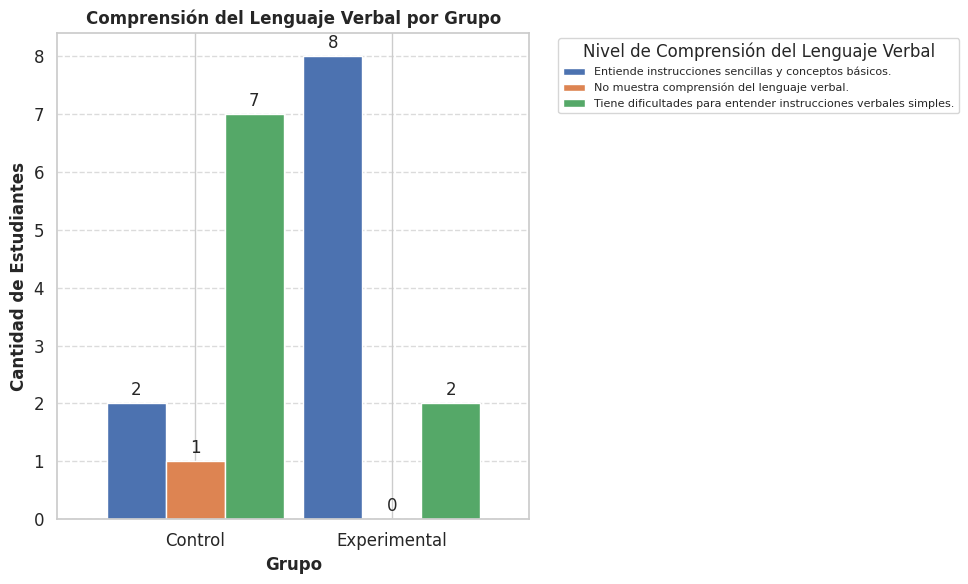

In [ ]:
grouped_data = dA.groupby(['Grupo', 'Comprensión del lenguaje verbal']).size().unstack(fill_value=0)

sns.set(style="whitegrid")
ax = grouped_data.plot(kind='bar', figsize=(10, 6), width=0.9)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

plt.title('Comprensión del Lenguaje Verbal por Grupo', fontsize=12, fontweight='bold')
plt.xlabel('Grupo', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Estudiantes', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Nivel de Comprensión del Lenguaje Verbal', fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

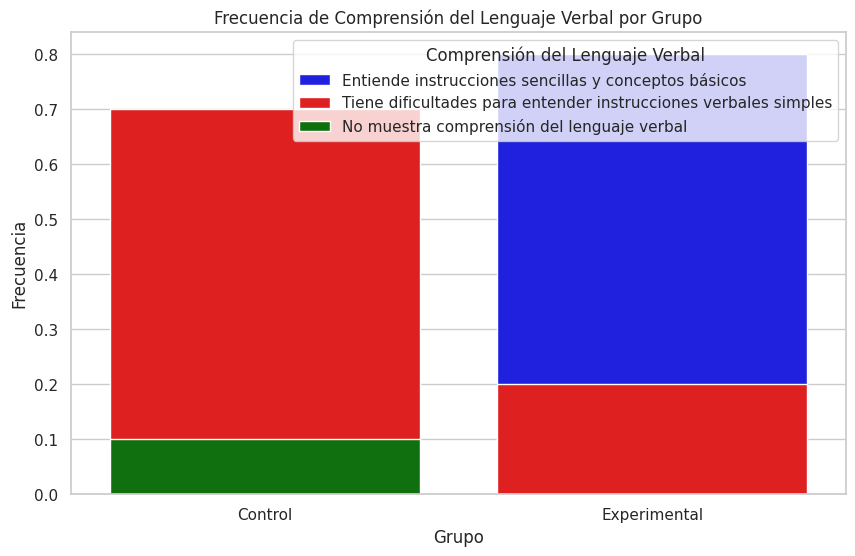

In [ ]:

grouped_data = dA.groupby(['Grupo', 'Comprensión del lenguaje verbal']).size().unstack(fill_value=0)

grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)


plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data.reset_index(), x='Grupo', y='Entiende instrucciones sencillas y conceptos básicos.', color='blue', label='Entiende instrucciones sencillas y conceptos básicos')
sns.barplot(data=grouped_data.reset_index(), x='Grupo', y='Tiene dificultades para entender instrucciones verbales simples.', color='red', label='Tiene dificultades para entender instrucciones verbales simples')
sns.barplot(data=grouped_data.reset_index(), x='Grupo', y='No muestra comprensión del lenguaje verbal.', color='green', label='No muestra comprensión del lenguaje verbal')

plt.title('Frecuencia de Comprensión del Lenguaje Verbal por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Frecuencia')
plt.legend(title='Comprensión del Lenguaje Verbal')
plt.show()

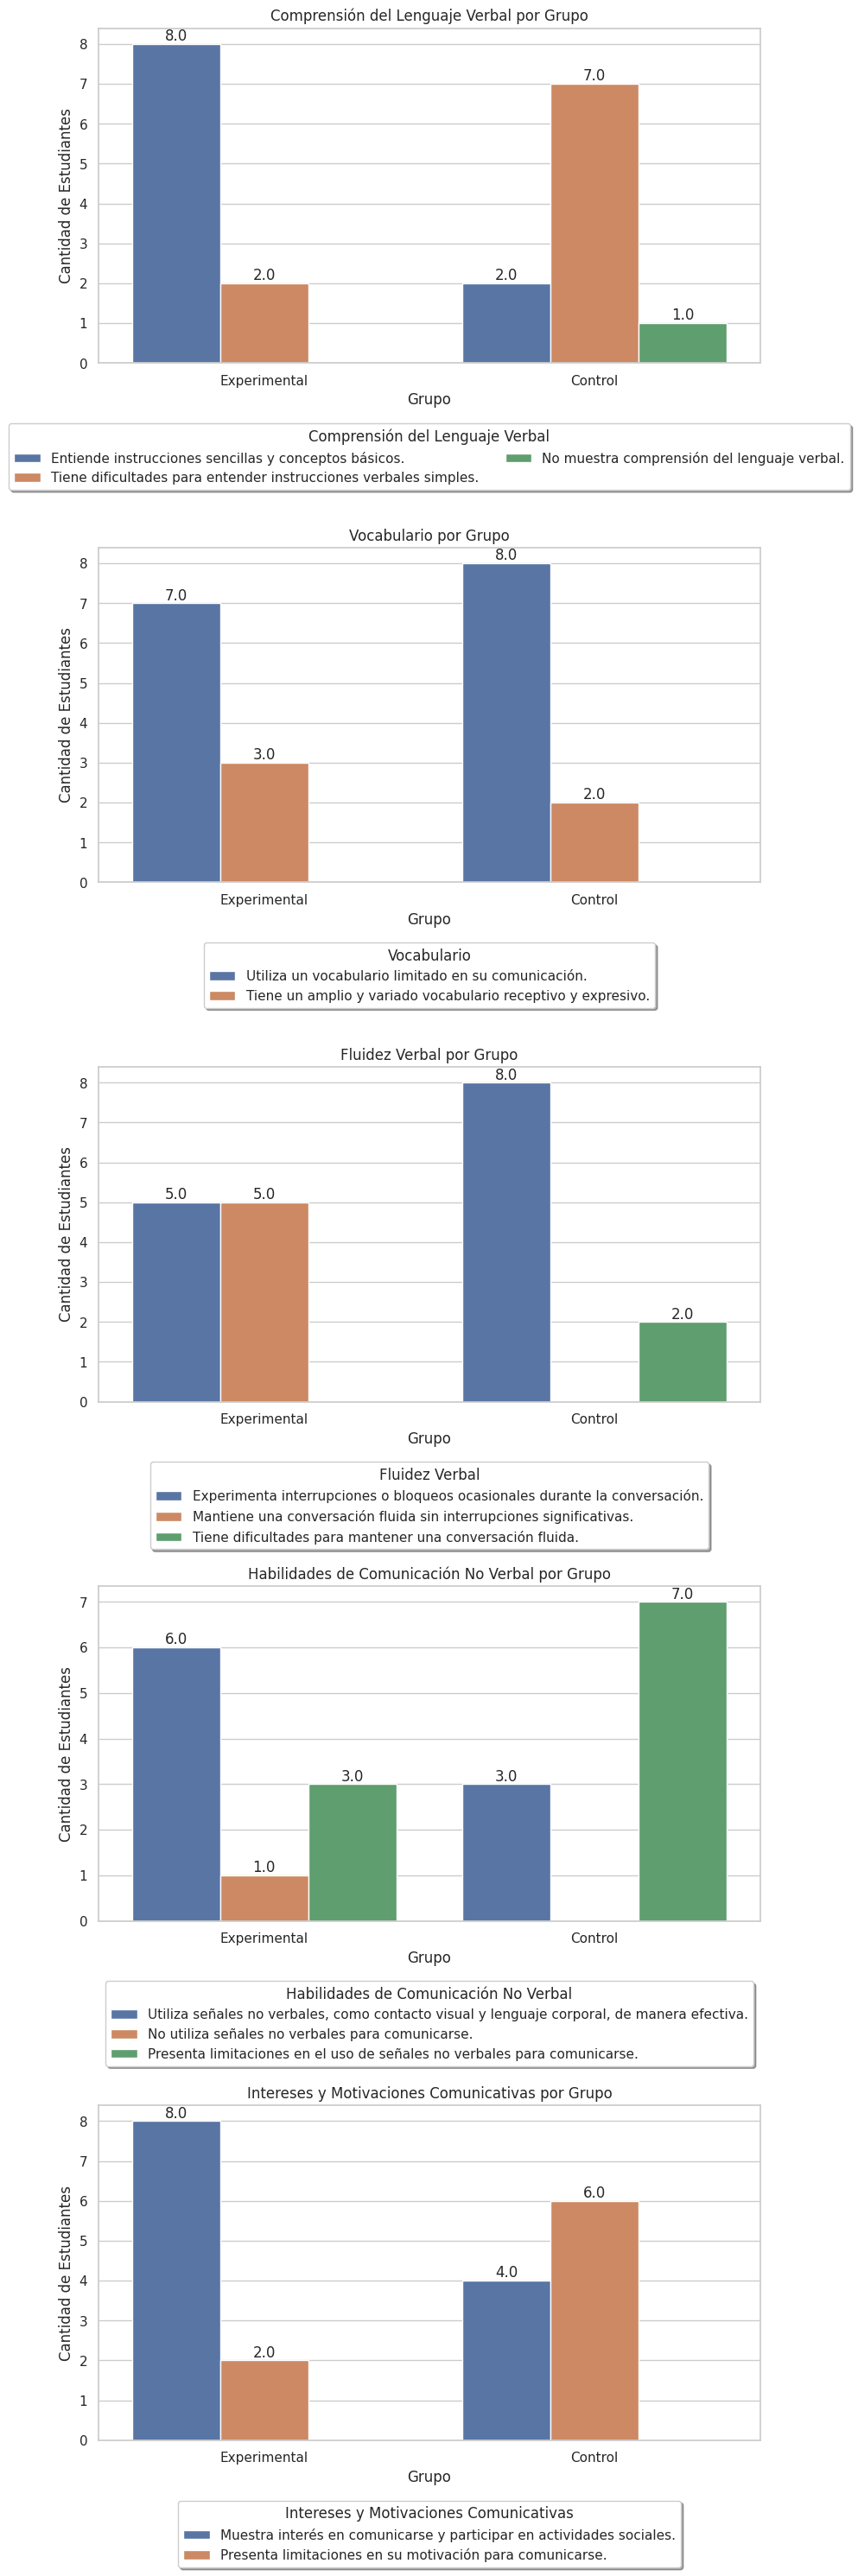

In [ ]:

categorias_comprension = dA['Comprensión del lenguaje verbal'].unique()
categorias_vocabulario = dA['Vocabulario'].unique()
categorias_fluidez = dA['Fluidez verbal'].unique()
categorias_habilidades = dA['Habilidades de comunicación no verbal'].unique()
categorias_intereses = dA['Intereses y motivaciones comunicativas'].unique()

longitudes = [len(categorias_comprension), len(categorias_vocabulario), len(categorias_fluidez), len(categorias_habilidades), len(categorias_intereses)]
max_longitud = max(longitudes)

categorias_comprension = list(categorias_comprension) + [None] * (max_longitud - len(categorias_comprension))
categorias_vocabulario = list(categorias_vocabulario) + [None] * (max_longitud - len(categorias_vocabulario))
categorias_fluidez = list(categorias_fluidez) + [None] * (max_longitud - len(categorias_fluidez))
categorias_habilidades = list(categorias_habilidades) + [None] * (max_longitud - len(categorias_habilidades))
categorias_intereses = list(categorias_intereses) + [None] * (max_longitud - len(categorias_intereses))

df_categorias = pd.DataFrame({
    'Comprensión del lenguaje verbal': categorias_comprension,
    'Vocabulario': categorias_vocabulario,
    'Fluidez verbal': categorias_fluidez,
    'Habilidades de comunicación no verbal': categorias_habilidades,
    'Intereses y motivaciones comunicativas': categorias_intereses
})


orden_grupos = sorted(dA['Grupo'].unique())

def add_frequency_lines(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

def adjust_label_position(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='bottom')

sns.set_style('whitegrid')

fig, axs = plt.subplots(5, 1, figsize=(10, 30))
¿
ax = sns.countplot(data=dA, x='Grupo', hue='Comprensión del lenguaje verbal', ax=axs[0], hue_order=df_categorias['Comprensión del lenguaje verbal'])
adjust_label_position(ax)
ax.set_title('Comprensión del Lenguaje Verbal por Grupo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Cantidad de Estudiantes')
ax.legend(title='Comprensión del Lenguaje Verbal', loc='upper center', bbox_to_anchor=(0.5, -0.16), shadow=True, ncol=2)

ax = sns.countplot(data=dA, x='Grupo', hue='Vocabulario', ax=axs[1], hue_order=df_categorias['Vocabulario'])
adjust_label_position(ax)
ax.set_title('Vocabulario por Grupo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Cantidad de Estudiantes')
ax.legend(title='Vocabulario', loc='upper center', bbox_to_anchor=(0.5, -0.16), shadow=True, ncol=1)

ax = sns.countplot(data=dA, x='Grupo', hue='Fluidez verbal', ax=axs[2], hue_order=df_categorias['Fluidez verbal'])
adjust_label_position(ax)
ax.set_title('Fluidez Verbal por Grupo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Cantidad de Estudiantes')
ax.legend(title='Fluidez Verbal', loc='upper center', bbox_to_anchor=(0.5, -0.16), shadow=True, ncol=1)

ax = sns.countplot(data=dA, x='Grupo', hue='Habilidades de comunicación no verbal', ax=axs[3], hue_order=df_categorias['Habilidades de comunicación no verbal'])
adjust_label_position(ax)
ax.set_title('Habilidades de Comunicación No Verbal por Grupo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Cantidad de Estudiantes')
ax.legend(title='Habilidades de Comunicación No Verbal', loc='upper center', bbox_to_anchor=(0.5, -0.16), shadow=True, ncol=1)

ax = sns.countplot(data=dA, x='Grupo', hue='Intereses y motivaciones comunicativas', ax=axs[4], hue_order=df_categorias['Intereses y motivaciones comunicativas'])
adjust_label_position(ax)
ax.set_title('Intereses y Motivaciones Comunicativas por Grupo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Cantidad de Estudiantes')
ax.legend(title='Intereses y Motivaciones Comunicativas', loc='upper center', bbox_to_anchor=(0.5, -0.16), shadow=True, ncol=1)

plt.tight_layout()

plt.show()


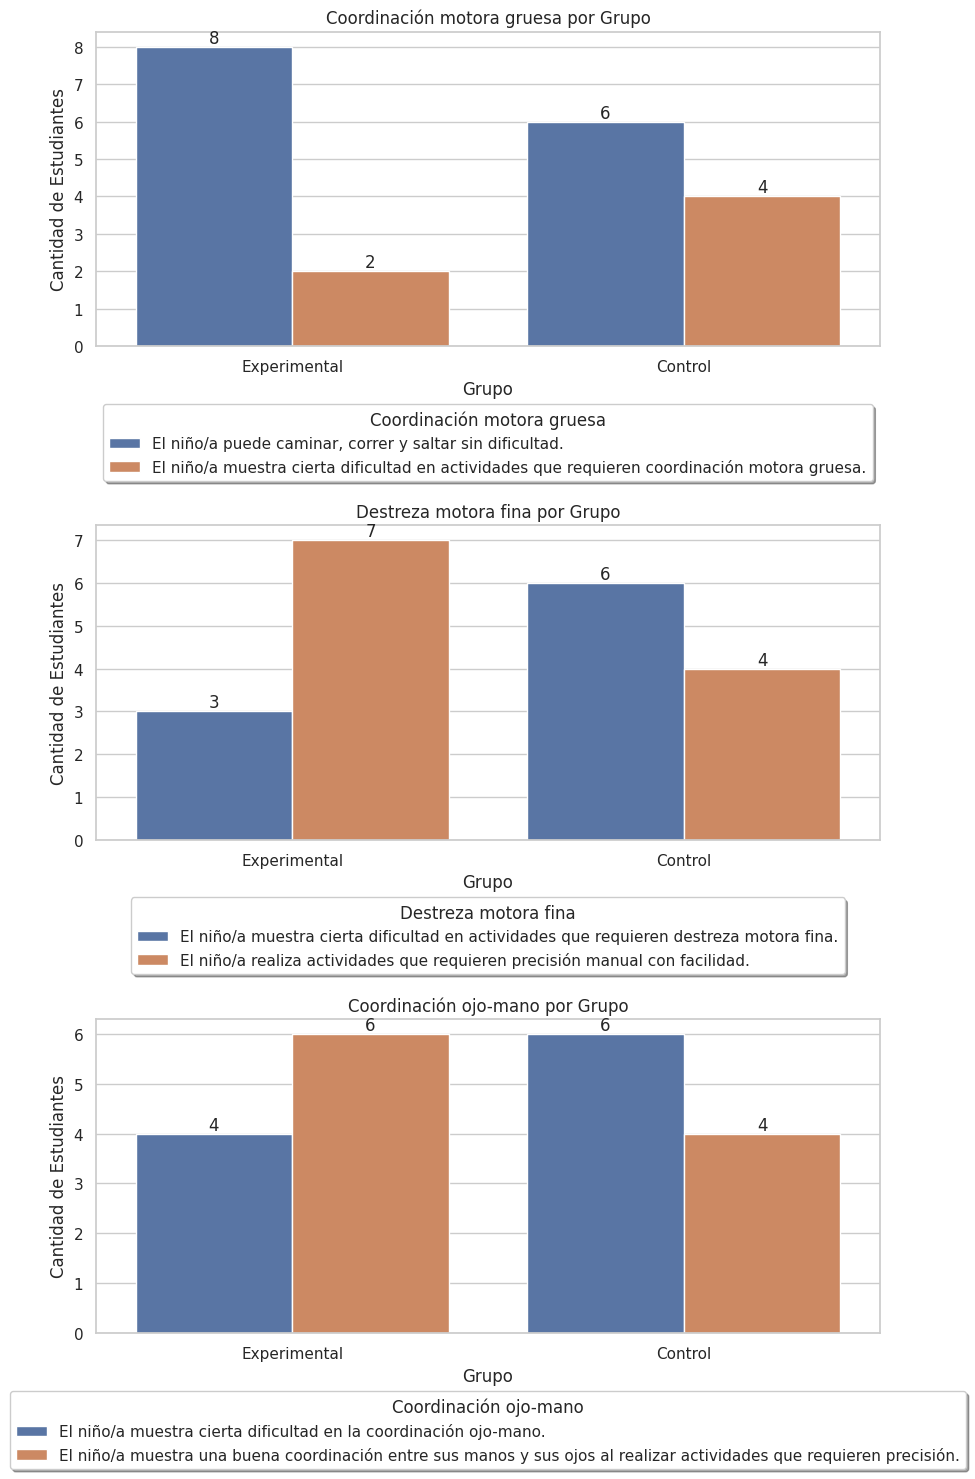

In [ ]:
columnas_interes = ['Grupo', 'Coordinación motora gruesa', 'Destreza motora fina', 'Coordinación ojo-mano']
datos_interes = dA[columnas_interes]

sns.set_style('whitegrid')

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

def add_frequency_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')

sns.countplot(data=datos_interes, x='Grupo', hue='Coordinación motora gruesa', ax=axs[0])
add_frequency_labels(axs[0])
axs[0].set_title('Coordinación motora gruesa por Grupo')
axs[0].set_xlabel('Grupo')
axs[0].set_ylabel('Cantidad de Estudiantes')
axs[0].legend(title='Coordinación motora gruesa', loc='upper center', bbox_to_anchor=(0.5, -0.16), shadow=True)

sns.countplot(data=datos_interes, x='Grupo', hue='Destreza motora fina', ax=axs[1])
add_frequency_labels(axs[1])
axs[1].set_title('Destreza motora fina por Grupo')
axs[1].set_xlabel('Grupo')
axs[1].set_ylabel('Cantidad de Estudiantes')
axs[1].legend(title='Destreza motora fina', loc='upper center', bbox_to_anchor=(0.5, -0.16), shadow=True)

sns.countplot(data=datos_interes, x='Grupo', hue='Coordinación ojo-mano', ax=axs[2])
add_frequency_labels(axs[2])
axs[2].set_title('Coordinación ojo-mano por Grupo')
axs[2].set_xlabel('Grupo')
axs[2].set_ylabel('Cantidad de Estudiantes')
axs[2].legend(title='Coordinación ojo-mano', loc='upper center', bbox_to_anchor=(0.5, -0.16), shadow=True)

plt.tight_layout()

plt.show()


In [ ]:
do = pd.read_csv("/content/Observadores.csv", sep=',')

In [ ]:
do.head()

,ID,Código del Observador,Lugar de la observación,Código asignado al estudiante observado,¿El estudiante muestra interés y participación en la interacción con la aplicación móvil?,¿El estudiante demuestra comprensión de las instrucciones y objetivos de la aplicación móvil?,¿El estudiante realiza las acciones requeridas correctamente dentro de la aplicación móvil?,¿El estudiante requiere apoyo o asistencia adicional durante la interacción con la aplicación móvil?,¿El estudiante utiliza el lenguaje verbal para expresarse durante la interacción con la aplicación móvil?,¿El estudiante utiliza gestos o señales para comunicarse durante la interacción con la aplicación móvil?,¿El estudiante busca compartir su experiencia o logros con el observador u otros presentes durante la interacción con la aplicación móvil?,"¿El estudiante muestra una atención sostenida hacia la aplicación móvil y las tareas que se le presentan? (Escala de 1 a 10, donde 1 es baja atención y 10 es alta atención)","¿El estudiante se distrae fácilmente durante la interacción con la aplicación móvil? (Escala de 1 a 10, donde 1 es fácilmente distraído y 10 es altamente enfocado)","¿Hay algún comportamiento, reacción o logro específico del estudiante durante la interacción con la aplicación móvil que destaque?"
0,1,OBJ0001,Escuela Loma Colorada,SJP932399,Esta emocionado,Sí,Le lleva tiempo,Sí,Sí,No,Sí,7,9,NaN
1,2,OBJ0002,Escuela Loma Colorada,SJP932399,Sí tiene interés,Sí,Le lleva tiempo,Sí,Sí,No,Sí,9,8,NaN
2,3,OBJ0001,Escuela Loma Colorada,SJP183846,Sí tiene interés,Sí,Sí,Sí,Sí,Sí,Sí,7,7,NaN
3,4,OBJ0002,Escuela Loma Colorada,SJP183846,Esta emocionado,Sí,Le lleva tiempo,Sí,Sí,No,Sí,7,8,NaN
4,5,OBJ0001,Escuela Loma Colorada,SJP646343,Se aparta,Sí,Se aparta en lugares ruidosos,Sí,Sí,Sí,Sí,6,6,"El estudiante logra cumplir con las tareas, so..."


In [ ]:
for column in do.columns:
    print(f"Columna '{column}': {do[column].dtype}")

Columna 'ID': int64
Columna 'Código del Observador': object
Columna 'Lugar de la observación': object
Columna 'Código asignado al estudiante observado': object
Columna '¿El estudiante muestra interés y participación en la interacción con la aplicación móvil?': object
Columna '¿El estudiante demuestra comprensión de las instrucciones y objetivos de la aplicación móvil?': object
Columna '¿El estudiante realiza las acciones requeridas correctamente dentro de la aplicación móvil?': object
Columna '¿El estudiante requiere apoyo o asistencia adicional durante la interacción con la aplicación móvil?': object
Columna '¿El estudiante utiliza el lenguaje verbal para expresarse durante la interacción con la aplicación móvil?': object
Columna '¿El estudiante utiliza gestos o señales para comunicarse durante la interacción con la aplicación móvil?': object
Columna '¿El estudiante busca compartir su experiencia o logros con el observador u otros presentes durante la interacción con la aplicación móv

<ipython-input-72-f69c4d00a1a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_interes, x=columnas_interes[0], ax=axs[0], palette='coolwarm')
<ipython-input-72-f69c4d00a1a4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_interes, x=columnas_interes[1], ax=axs[1], palette='coolwarm')


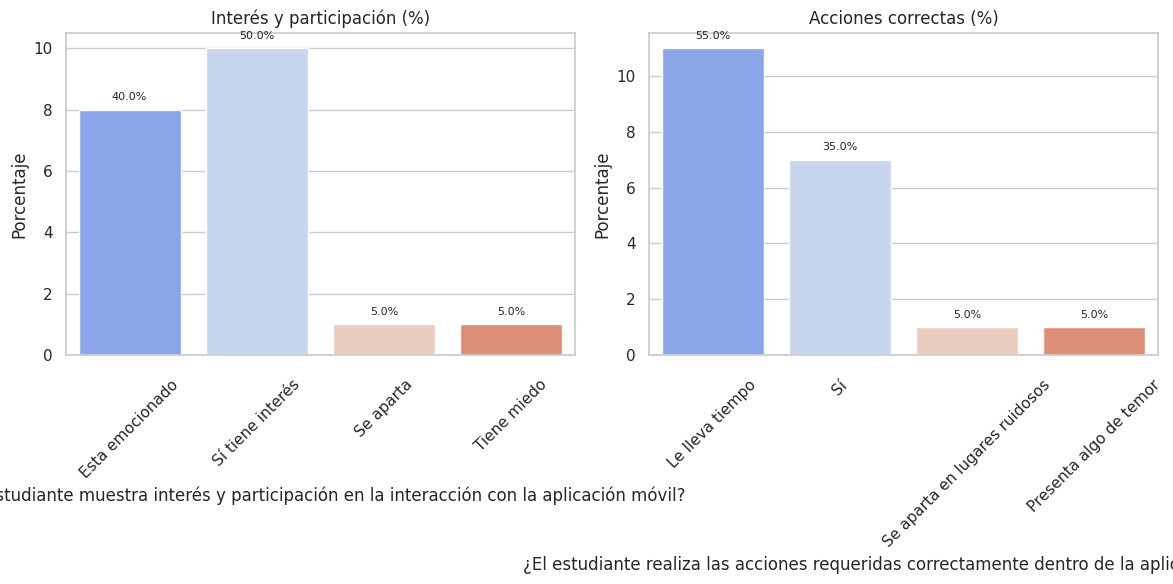

In [ ]:
columnas_interes = [
    "¿El estudiante muestra interés y participación en la interacción con la aplicación móvil?",
    "¿El estudiante realiza las acciones requeridas correctamente dentro de la aplicación móvil?"
]
datos_interes = do[columnas_interes]

total_estudiantes = len(datos_interes)
porcentaje_interes = datos_interes.iloc[:, 0].value_counts(normalize=True) * 100
porcentaje_acciones = datos_interes.iloc[:, 1].value_counts(normalize=True) * 100

sns.set_style('whitegrid')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=datos_interes, x=columnas_interes[0], ax=axs[0], palette='coolwarm')
axs[0].set_title('Interés y participación (%)')
axs[0].set_ylabel('Porcentaje')
for p in axs[0].patches:  # Agregar etiquetas con porcentaje
    axs[0].annotate(f'{p.get_height() / total_estudiantes * 100:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=8)
axs[0].tick_params(axis='x', labelrotation=45, pad=10)

sns.countplot(data=datos_interes, x=columnas_interes[1], ax=axs[1], palette='coolwarm')
axs[1].set_title('Acciones correctas (%)')
axs[1].set_ylabel('Porcentaje')
for p in axs[1].patches:  # Agregar etiquetas con porcentaje
    axs[1].annotate(f'{p.get_height() / total_estudiantes * 100:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=8)
axs[1].tick_params(axis='x', labelrotation=45, pad=10)
fig.text(0.5, 0.5, 'Este texto oculta las etiquetas del eje x', alpha=0)

plt.tight_layout()

plt.show()



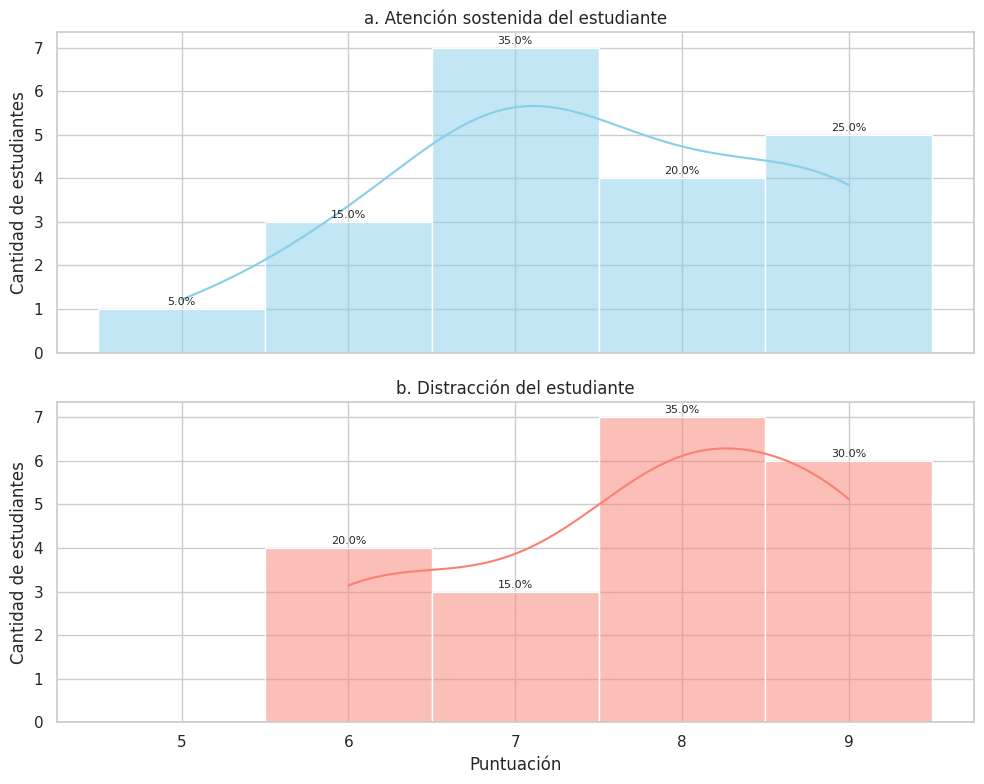

In [ ]:
columnas_interes = [
    "¿El estudiante muestra una atención sostenida hacia la aplicación móvil y las tareas que se le presentan? (Escala de 1 a 10, donde 1 es baja atención y 10 es alta atención)",
    "¿El estudiante se distrae fácilmente durante la interacción con la aplicación móvil? (Escala de 1 a 10, donde 1 es fácilmente distraído y 10 es altamente enfocado)"
]

datos_interes = df[columnas_interes]

nuevos_nombres = ["Atención", "Distraído"]
datos_interes.columns = nuevos_nombres

sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax = sns.histplot(data=datos_interes, x="Atención", bins=range(1, 12), discrete=True, ax=axs[0], kde=True, color='skyblue')
ax.set_title("a. Atención sostenida del estudiante")
ax.set_xlabel("Puntuación")
ax.set_ylabel("Cantidad de estudiantes")
ax.tick_params(axis='x', rotation=0)

total = len(datos_interes["Atención"])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=8, xytext=(0, 5),
                textcoords='offset points')

ax = sns.histplot(data=datos_interes, x="Distraído", bins=range(1, 12), discrete=True, ax=axs[1], kde=True, color='salmon')
ax.set_title("b. Distracción del estudiante")
ax.set_xlabel("Puntuación")
ax.set_ylabel("Cantidad de estudiantes")
ax.tick_params(axis='x', rotation=0)

total = len(datos_interes["Distraído"])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=8, xytext=(0, 5),
                textcoords='offset points')


plt.tight_layout()


plt.show()




In [ ]:
dt = pd.read_csv("/content/Tutores.csv", sep=',')

In [ ]:
dt.head()

,ID,Código del tutor,¿Cuánto tiempo ha utilizado el niño la aplicación móvil en RA,"PreguntaEn una escala del 1 al 10, donde 1 es ""muy difícil"" y 10 es ""muy fácil"", ¿cómo calificarías la facilidad de uso de la aplicación para el niño?",¿Consideras que la aplicación ha sido útil para el aprendizaje y desarrollo del niño con TEA?,"¿Has notado mejoras en las habilidades del niño (por ejemplo, habilidades de interacción social, comprensión de conceptos científicos, motricidad fina, etc.) desde que comenzó a utilizar la aplica...",¿Consideras que la aplicación se adapta a las necesidades individuales del niño?,¿Has encontrado alguna dificultad para utilizar alguna funcionalidad específica de la aplicación?,"En una escala del 1 al 10, donde 1 es ""muy insatisfactorio"" y 10 es ""muy satisfactorio"", ¿cómo calificarías la utilidad de la aplicación para el niño con TEA?",¿Recomendarías esta aplicación móvil a otros tutores de niños con TEA?,Pregunta¿Qué sugerencias o mejoras podrías brindarnos para hacer la aplicación más efectiva y adecuada para los niños con TEA?,Algún otro comentario
0,1,TJP585683,de 1 a 3 semanas,9,Sí,Sí,Sí,No,10,Sí,NaN,Me impresiona cómo utiliza la tecnología para ...
1,2,TJP183846,de 1 a 3 semanas,9,Sí,Sí,Sí,No,8,Sí,NaN,"Como tutor, encuentro que esta aplicación es u..."
2,3,TJP633646,de 1 a 3 semanas,9,Sí,Sí,Sí,No,8,Sí,NaN,Es una excelente manera de mantener comprometi...
3,4,TJP926734,de 1 a 3 semanas,10,Sí,Sí,Sí,No,10,Sí,NaN,Estoy emocionado de ver cómo mejora su experie...
4,5,TJP766819,de 1 a 3 semanas,9,Sí,Sí,Sí,No,9,Sí,NaN,Esta aplicación es un ejemplo perfecto de cómo...


In [ ]:
for column in dt.columns:
    print(f"Columna '{column}': {dt[column].dtype}")

Columna 'ID': int64
Columna 'Código del tutor': object
Columna '¿Cuánto tiempo ha utilizado el niño la aplicación móvil en RA': object
Columna 'PreguntaEn una escala del 1 al 10, donde 1 es "muy difícil" y 10 es "muy fácil", ¿cómo calificarías la facilidad de uso de la aplicación para el niño?': int64
Columna '¿Consideras que la aplicación ha sido útil para el aprendizaje y desarrollo del niño con TEA?': object
Columna '¿Has notado mejoras en las habilidades del niño (por ejemplo, habilidades de interacción social, comprensión de conceptos científicos, motricidad fina, etc.) desde que comenzó a utilizar la aplica...': object
Columna '¿Consideras que la aplicación se adapta a las necesidades individuales del niño?': object
Columna '¿Has encontrado alguna dificultad para utilizar alguna funcionalidad específica de la aplicación?': object
Columna 'En una escala del 1 al 10, donde 1 es "muy insatisfactorio" y 10 es "muy satisfactorio", ¿cómo calificarías la utilidad de la aplicación para e

In [ ]:
nuevos_nombres = {
    'En una escala del 1 al 10, donde 1 es "muy insatisfactorio" y 10 es "muy satisfactorio", ¿cómo calificarías la utilidad de la aplicación para el niño con TEA?': 'Utilidad',
    'PreguntaEn una escala del 1 al 10, donde 1 es "muy difícil" y 10 es "muy fácil", ¿cómo calificarías la facilidad de uso de la aplicación para el niño?': 'Facilidad de Uso'
}

dt.rename(columns=nuevos_nombres, inplace=True)


<ipython-input-194-21813b6358d5>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



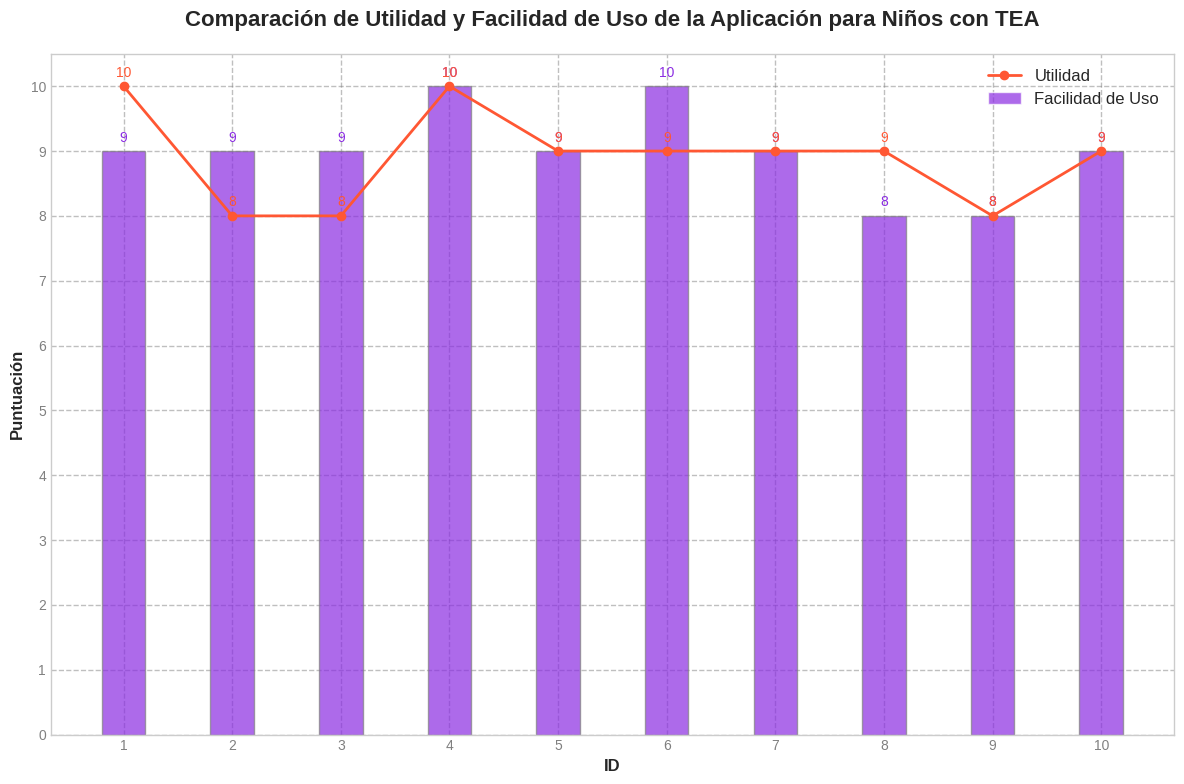

<ipython-input-194-21813b6358d5>:30: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



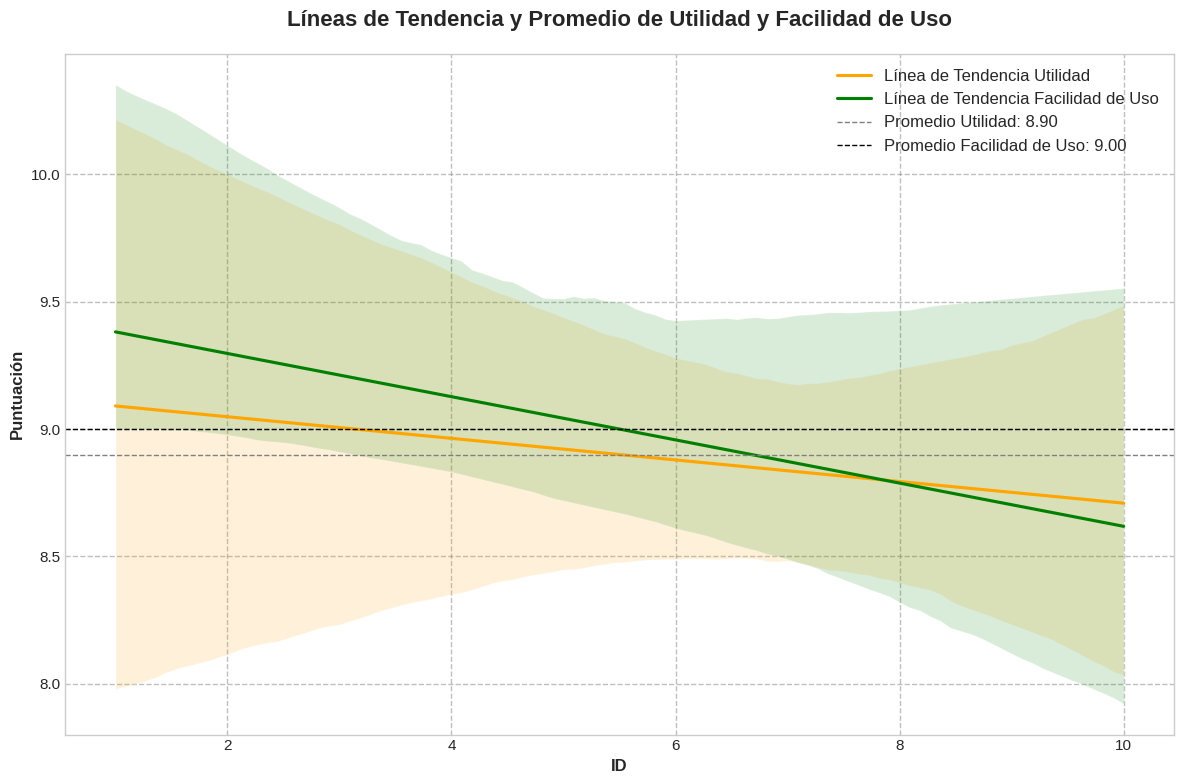

In [ ]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-whitegrid')

plt.plot(dt['ID'], dt['Utilidad'], marker='o', color='#FF5733', linewidth=2, label='Utilidad', zorder=2)
plt.bar(dt['ID'], dt['Facilidad de Uso'], color='#8A2BE2', alpha=0.7, width=0.4, label='Facilidad de Uso', zorder=1)

plt.xlabel('ID', fontsize=12, fontweight='bold')
plt.ylabel('Puntuación', fontsize=12, fontweight='bold')
plt.title('Comparación de Utilidad y Facilidad de Uso de la Aplicación para Niños con TEA', fontsize=16, fontweight='bold', pad=20)

plt.legend(fontsize=12)

for i, utilidad, facilidad in zip(dt['ID'], dt['Utilidad'], dt['Facilidad de Uso']):
    plt.text(i, facilidad + 0.1, str(facilidad), ha='center', va='bottom', fontsize=10, color='#8A2BE2')
    plt.text(i, utilidad + 0.1, str(utilidad), ha='center', va='bottom', fontsize=10, color='#FF5733')

for bar in plt.gca().patches:
    bar.set_edgecolor('gray')
    bar.set_linewidth(1)

plt.grid(True, linestyle='--', alpha=0.5, color='gray')

plt.yticks(np.arange(0, max(dt['Facilidad de Uso']) + 1, 1), fontsize=10, color='gray')

plt.xticks(dt['ID'], fontsize=10, color='gray')
plt.tight_layout()  # Ajustar el diseño
plt.show()

plt.figure(figsize=(12, 8))
plt.style.use('seaborn-whitegrid')

sns.regplot(x=dt['ID'], y=dt['Utilidad'], scatter=False, color='orange', label='Línea de Tendencia Utilidad', ax=plt.gca())
sns.regplot(x=dt['ID'], y=dt['Facilidad de Uso'], scatter=False, color='green', label='Línea de Tendencia Facilidad de Uso', ax=plt.gca())

mean_utilidad = dt['Utilidad'].mean()
mean_facilidad = dt['Facilidad de Uso'].mean()
plt.axhline(y=mean_utilidad, color='gray', linestyle='--', linewidth=1, label='Promedio Utilidad: {:.2f}'.format(mean_utilidad))
plt.axhline(y=mean_facilidad, color='black', linestyle='--', linewidth=1, label='Promedio Facilidad de Uso: {:.2f}'.format(mean_facilidad))

plt.xlabel('ID', fontsize=12, fontweight='bold')
plt.ylabel('Puntuación', fontsize=12, fontweight='bold')
plt.title('Líneas de Tendencia y Promedio de Utilidad y Facilidad de Uso', fontsize=16, fontweight='bold', pad=20)

plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5, color='gray')

plt.tight_layout()  # Ajustar el diseño
plt.show()


In [ ]:
dc = pd.read_csv("/content/NivelCumplimiento.csv", sep=',')

In [ ]:
dc.head()

,Id,Insertar código del estudiante,"Saber básico esperado.Busca, selecciona y organiza información concreta y relevante, la analiza, obtiene conclusiones, comunica su experiencia, oralmente y por escrito.","Saber básico esperado.Consulta y utiliza documentos escritos, imágenes y gráficos.",Saber básico esperado.Utiliza adecuadamente el vocabulario correspondiente a cada bloque de contenidos.,Saber básico esperado.Observa e identifica las características básicas de las plantas.,Saber básico esperado.Clasifica plantas en diferentes grupos por sus características básicas.,Saber básico esperado.Muestra conductas de respeto y cuidado hacia los seres vivos. (plantas),"Saber básico esperado.Busca, selecciona y organiza información concreta y relevante, la analiza, obtiene conclusiones, comunica su experiencia, oralmente y por escrito.1","Saber básico esperado.Consulta y utiliza documentos escritos, imágenes y gráficos. 1",Saber básico esperado.Utiliza adecuadamente el vocabulario correspondiente a cada bloque de contenidos.1,Saber básico esperado.Observa e identifica las características básicas de las plantas.1,Saber básico esperado.Clasifica plantas en diferentes grupos por sus características básicas.1,Saber básico esperado.Muestra conductas de respeto y cuidado hacia los seres vivos. (plantas)1
0,1,SJP932399,C,C,P,C,P,C,6,6,5,6,4,7
1,2,SJP183846,C,C,P,C,C,C,6,5,6,5,5,6
2,3,SJP646343,P,P,C,P,C,C,5,5,6,7,6,5
3,4,SJP686794,C,C,P,C,P,C,6,7,6,6,7,6
4,5,SJP744954,C,P,C,C,C,P,4,5,5,6,7,7


In [ ]:
for column in dc.columns:
    print(f"Columna '{column}': {dc[column].dtype}")

Columna 'Id': int64
Columna 'Insertar código del estudiante': object
Columna 'Saber básico esperado.Busca, selecciona y organiza información concreta y relevante, la analiza, obtiene conclusiones, comunica su experiencia, oralmente y por escrito.': object
Columna 'Saber básico esperado.Consulta y utiliza documentos escritos, imágenes y gráficos.': object
Columna 'Saber básico esperado.Utiliza adecuadamente el vocabulario correspondiente a cada bloque de contenidos.': object
Columna 'Saber básico esperado.Observa e identifica las características básicas de las plantas.': object
Columna 'Saber básico esperado.Clasifica plantas en diferentes grupos por sus características básicas.': object
Columna 'Saber básico esperado.Muestra conductas de respeto y cuidado hacia los seres vivos. (plantas)': object
Columna 'Saber básico esperado.Busca, selecciona y organiza información concreta y relevante, la analiza, obtiene conclusiones, comunica su experiencia, oralmente y por escrito.1': int64
Colum

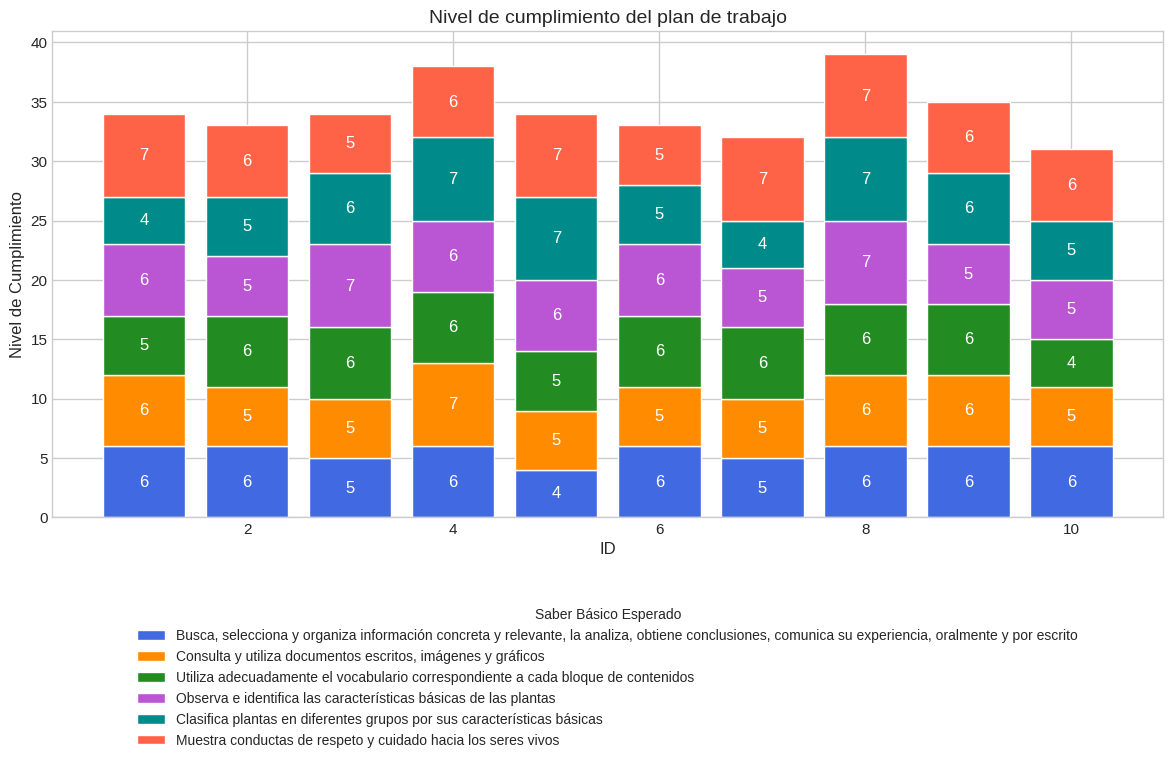

In [ ]:
columnas_interes = [
    'Saber básico esperado.Busca, selecciona y organiza información concreta y relevante, la analiza, obtiene conclusiones, comunica su experiencia, oralmente y por escrito.1',
    'Saber básico esperado.Consulta y utiliza documentos escritos, imágenes y gráficos. 1',
    'Saber básico esperado.Utiliza adecuadamente el vocabulario correspondiente a cada bloque de contenidos.1',
    'Saber básico esperado.Observa e identifica las características básicas de las plantas.1',
    'Saber básico esperado.Clasifica plantas en diferentes grupos por sus características básicas.1',
    'Saber básico esperado.Muestra conductas de respeto y cuidado hacia los seres vivos. (plantas)1'
]

plt.figure(figsize=(12, 8))

colores = ['royalblue', 'darkorange', 'forestgreen', 'mediumorchid', 'Darkcyan', 'tomato']

bottom = [0] * len(dc)
for i, columna in enumerate(columnas_interes):
    plt.bar(dc['Id'], dc[columna], label=columna.split('.')[1], bottom=bottom, color=colores[i])
    for j, valor in enumerate(dc[columna]):
        plt.text(dc['Id'][j], bottom[j] + valor / 2, str(valor), ha='center', va='center', color='white')  # Etiquetas en blanco
    bottom = [bottom[j] + valor for j, valor in enumerate(dc[columna])]

# Añadiendo etiquetas y título
plt.xlabel('ID', fontsize=12)
plt.ylabel('Nivel de Cumplimiento', fontsize=12)
plt.title('Nivel de cumplimiento del plan de trabajo', fontsize=14)
plt.legend(title='Saber Básico Esperado', fontsize=10, title_fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.16))

# Ajustes estéticos adicionales
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:

dc.rename(columns={
    'Saber básico esperado.Busca, selecciona y organiza información concreta y relevante, la analiza, obtiene conclusiones, comunica su experiencia, oralmente y por escrito.1': 'Habilidad de Búsqueda y Análisis de Información',
    'Saber básico esperado.Consulta y utiliza documentos escritos, imágenes y gráficos. 1': 'Uso de Documentos e Imágenes',
    'Saber básico esperado.Utiliza adecuadamente el vocabulario correspondiente a cada bloque de contenidos.1': 'Uso Adecuado de Vocabulario',
    'Saber básico esperado.Observa e identifica las características básicas de las plantas.1': 'Identificación de Características de Plantas',
    'Saber básico esperado.Clasifica plantas en diferentes grupos por sus características básicas.1': 'Clasificación de Plantas',
    'Saber básico esperado.Muestra conductas de respeto y cuidado hacia los seres vivos. (plantas)1': 'Respeto y Cuidado hacia los Seres Vivos (Plantas)'
}, inplace=True)

competencias = dc[['Habilidad de Búsqueda y Análisis de Información',
                   'Uso de Documentos e Imágenes',
                   'Uso Adecuado de Vocabulario',
                   'Identificación de Características de Plantas',
                   'Clasificación de Plantas',
                   'Respeto y Cuidado hacia los Seres Vivos (Plantas)']]


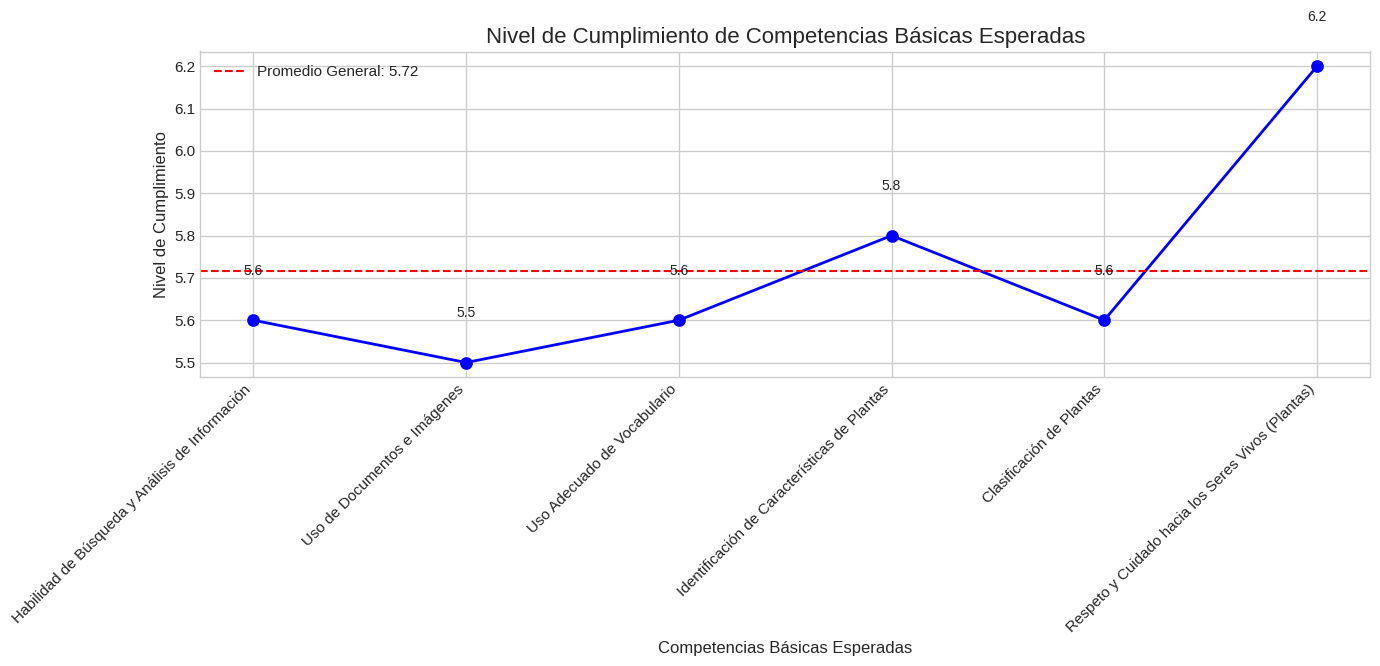

In [ ]:

promedio_por_competencia = competencias.mean()

plt.figure(figsize=(14, 7))
sns.scatterplot(x=promedio_por_competencia.index, y=promedio_por_competencia.values, color='blue', s=100)
for i in range(len(promedio_por_competencia)):
    plt.text(promedio_por_competencia.index[i], promedio_por_competencia.values[i] + 0.1, round(promedio_por_competencia.values[i], 2), ha='center', va='bottom', fontsize=10)
plt.plot(promedio_por_competencia.index, promedio_por_competencia.values, color='blue', linewidth=2, linestyle='-', marker='o')
plt.title('Nivel de Cumplimiento de Competencias Básicas Esperadas', fontsize=16)
plt.xlabel('Competencias Básicas Esperadas', fontsize=12)
plt.ylabel('Nivel de Cumplimiento', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

promedio_general = promedio_por_competencia.mean()
plt.axhline(y=promedio_general, color='red', linestyle='--', label=f'Promedio General: {round(promedio_general, 2)}')
plt.legend()

plt.tight_layout()
plt.show()

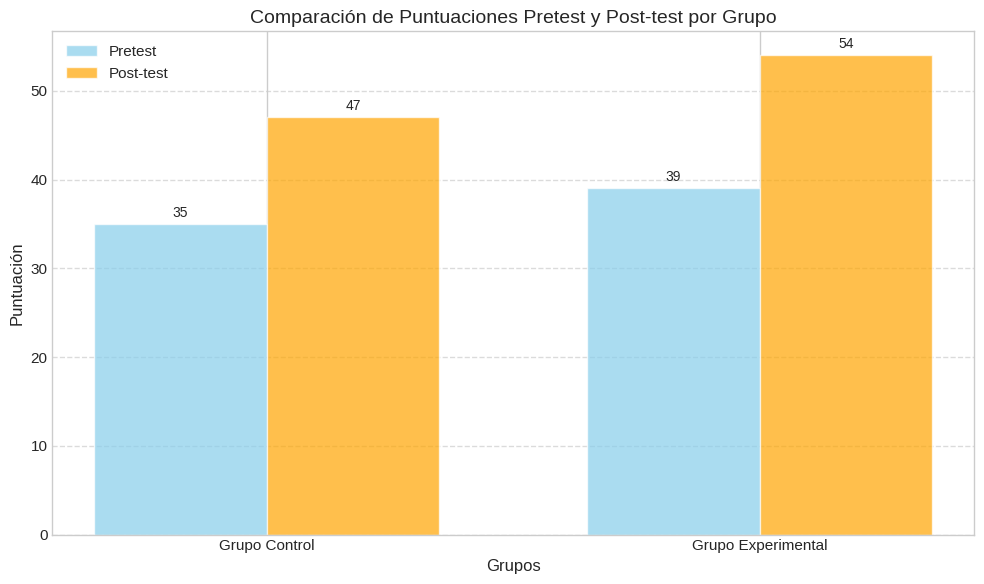

In [ ]:

grupos = ['Grupo Control', 'Grupo Experimental']
pretest = [35, 39]
posttest = [47, 54]

x = range(len(grupos))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x, pretest, width, label='Pretest', color='skyblue', alpha=0.7)
bars2 = ax.bar([i + width for i in x], posttest, width, label='Post-test', color='orange', alpha=0.7)

ax.set_xlabel('Grupos', fontsize=12)
ax.set_ylabel('Puntuación', fontsize=12)
ax.set_title('Comparación de Puntuaciones Pretest y Post-test por Grupo', fontsize=14)
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(grupos, fontsize=11)
ax.legend(fontsize=11)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
dpt = pd.read_csv("/content/PretestPost.csv", sep=',')

In [ ]:
for column in dpt.columns:
    print(f"Columna '{column}': {dpt[column].dtype}")

Columna 'ID': int64
Columna 'Total de puntos': int64
Columna 'Total de puntos a obtener': int64
Columna 'Tipo de test': object
Columna 'Código del estudiante': object
Columna 'Grupo': object
Columna '¿Qué partes tiene una planta?': object
Columna 'Puntos: ¿Qué partes tiene una planta?': int64
Columna '¿Por qué las plantas son importantes para los humanos y el planeta?': object
Columna 'Puntos: ¿Por qué las plantas son importantes para los humanos y el planeta?': int64
Columna '¿Cómo se llama el proceso por el cual las plantas convierten la luz del sol en alimento?': object
Columna 'Puntos: ¿Cómo se llama el proceso por el cual las plantas convierten la luz del sol en alimento?': int64
Columna 'Las plantas pueden ser de colores variados': object
Columna 'Puntos: Las plantas pueden ser de colores variados': int64
Columna '¿Cómo se llama la parte de la planta donde crecen las flores, hojas y muchas ocaciones los frutos?': object
Columna 'Puntos: ¿Cómo se llama la parte de la planta donde 

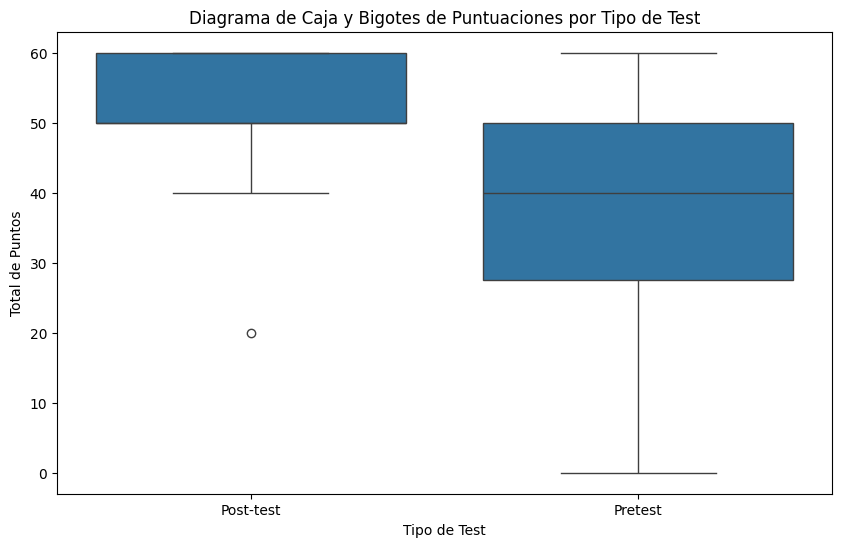

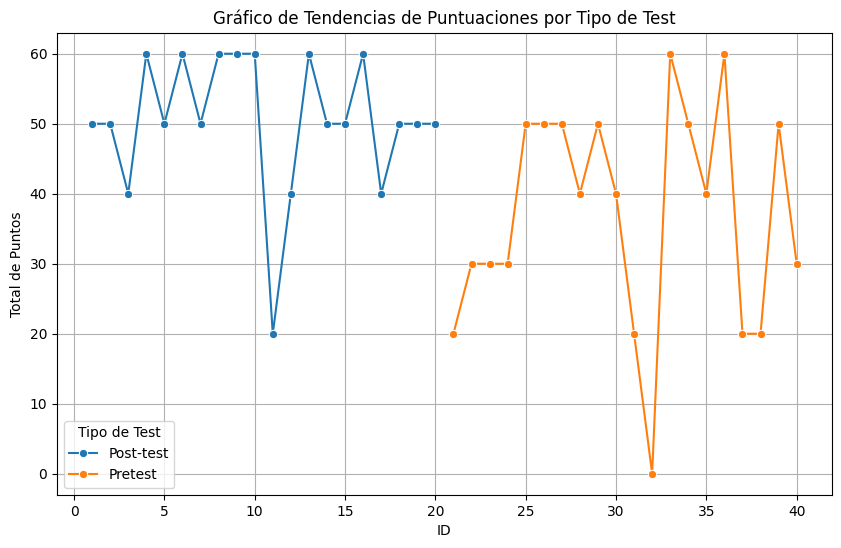

In [ ]:
# Diagrama de caja y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo de test', y='Total de puntos', data=dpt)
plt.title('Diagrama de Caja y Bigotes de Puntuaciones por Tipo de Test')
plt.xlabel('Tipo de Test')
plt.ylabel('Total de Puntos')
plt.show()

# Gráfico de tendencias
plt.figure(figsize=(10, 6))
sns.lineplot(data=dpt, x='ID', y='Total de puntos', hue='Tipo de test', marker='o')
plt.title('Gráfico de Tendencias de Puntuaciones por Tipo de Test')
plt.xlabel('ID')
plt.ylabel('Total de Puntos')
plt.legend(title='Tipo de Test')
plt.grid(True)
plt.show()

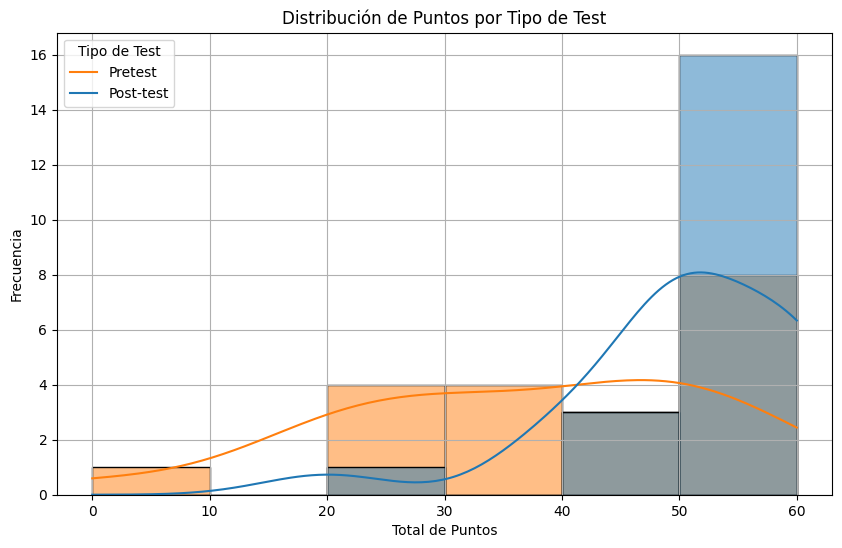

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=dpt, x='Total de puntos', hue='Tipo de test', bins=range(0, 61, 10), kde=True)

plt.title('Distribución de Puntos por Tipo de Test')
plt.xlabel('Total de Puntos')
plt.ylabel('Frecuencia')

plt.legend(title='Tipo de Test', labels=['Pretest', 'Post-test'])

# Agregar texto explicativo sobre el gráfico
#plt.text(45, 40, 'El eje x representa el total de puntos obtenidos en la evaluación', fontsize=10)
#plt.text(45, 20, 'La frecuencia en el eje y indica cuántas veces se observa cada rango de puntos', fontsize=10)
#plt.text(45, 5, 'El color azul representa el Pretest y el color naranja representa el Post-test', fontsize=10)

plt.grid(True)
plt.show()


In [ ]:
dax = pd.read_csv("/content/MAX.csv", sep=',')

In [ ]:
for column in dax.columns:
    print(f"Columna '{column}': {dax[column].dtype}")

Columna 'ID': int64
Columna 'Insertar código del estudiante': object
Columna 'Pregunta al niño: "¿Puedes identificar las partes de esta planta?"': object
Columna 'Registra las respuestas del niño y observa si identifica correctamente las partes básicas de la planta, como las raíces, tallo, hojas y flores. Del 1 al 10': int64
Columna 'Registra las respuestas del niño y observa si puede diferenciar entre diferentes tipos de semillas, como maíz, frijol, girasol y calabaza. Del 1 al 10': int64
Columna 'Semilla': int64
Columna 'Germinación': int64
Columna 'Plántula': int64
Columna 'Planta': int64
Columna 'Pregunta al niño: "¿Cuál es el orden correcto del proceso de germinación de una semilla?"
Logro responder adecuadamente': object
Columna '¿Registra su cantidad de respuestas correctas obtenidas?': int64
Columna '¿Registra su cantidad de respuestas erróneas obtenidas?': int64
Columna '¿Te gustó usar la aplicación?': int64
Columna '¿Fue fácil entender las actividades?': int64
Columna '¿Qué f

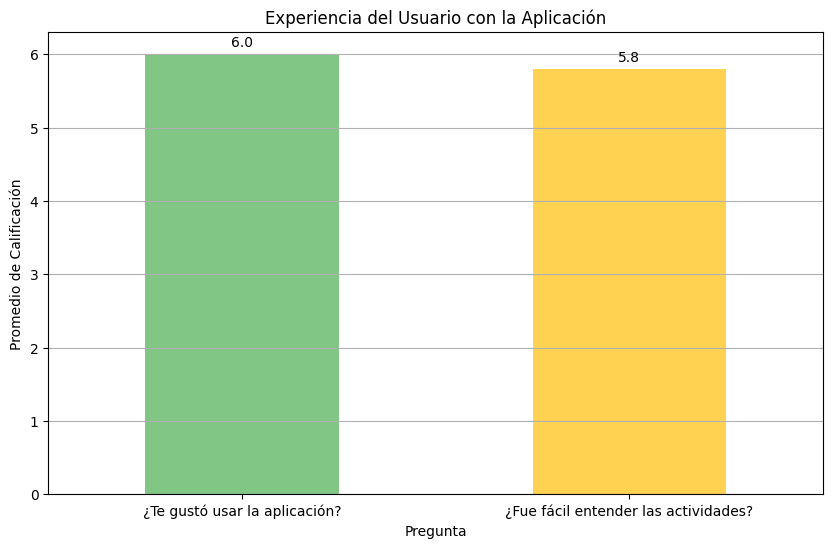

In [ ]:

datos_interes = dax[['¿Te gustó usar la aplicación?', '¿Fue fácil entender las actividades?']]

# Calculando los promedios de cada columna
promedio_por_pregunta = datos_interes.mean()

# Configurando los colores
colores = ['#4CAF50', '#FFC107']

# Creando el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
promedio_por_pregunta.plot(kind='bar', color=colores, alpha=0.7)

# Etiquetas y título
plt.title('Experiencia del Usuario con la Aplicación')
plt.xlabel('Pregunta')
plt.ylabel('Promedio de Calificación')
plt.xticks([0, 1], ['¿Te gustó usar la aplicación?', '¿Fue fácil entender las actividades?'], rotation=0)

# Añadiendo etiquetas a cada barra
for i, valor in enumerate(promedio_por_pregunta):
    plt.text(i, valor + 0.1, round(valor, 2), ha='center')

# Mostrando el gráfico
plt.grid(axis='y')
plt.show()


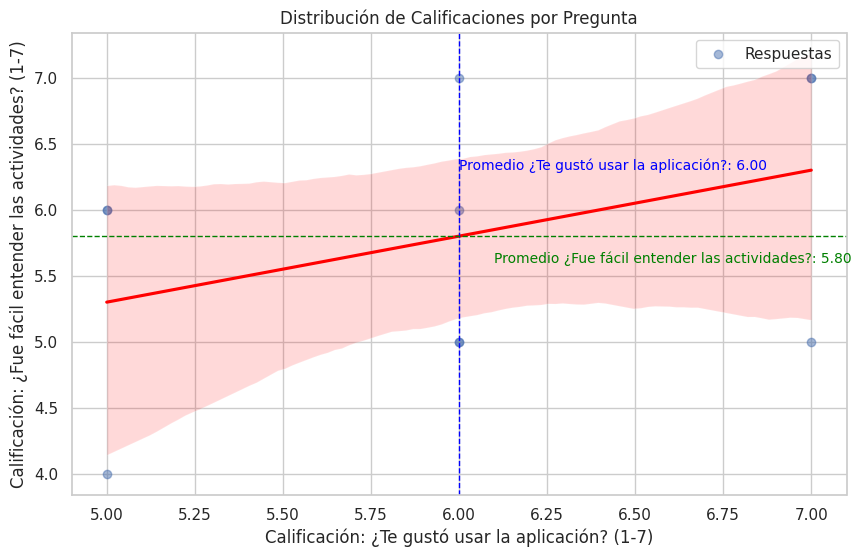

In [ ]:
datos_interes = dax[['¿Te gustó usar la aplicación?', '¿Fue fácil entender las actividades?']]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x='¿Te gustó usar la aplicación?', y='¿Fue fácil entender las actividades?', data=datos_interes, scatter_kws={'alpha':0.5}, scatter=True, line_kws={"color": "red"})

plt.title('Distribución de Calificaciones por Pregunta')
plt.xlabel('Calificación: ¿Te gustó usar la aplicación? (1-7)')
plt.ylabel('Calificación: ¿Fue fácil entender las actividades? (1-7)')

plt.axvline(x=datos_interes['¿Te gustó usar la aplicación?'].mean(), color='blue', linestyle='--', linewidth=1)
plt.axhline(y=datos_interes['¿Fue fácil entender las actividades?'].mean(), color='green', linestyle='--', linewidth=1)

plt.text(datos_interes['¿Te gustó usar la aplicación?'].mean() + 0, datos_interes['¿Fue fácil entender las actividades?'].mean()+0.5, 'Promedio ¿Te gustó usar la aplicación?: {:.2f}'.format(datos_interes['¿Te gustó usar la aplicación?'].mean()), color='blue', fontsize=10)
plt.text(datos_interes['¿Te gustó usar la aplicación?'].mean() +0.1, datos_interes['¿Fue fácil entender las actividades?'].mean() -0.2, 'Promedio ¿Fue fácil entender las actividades?: {:.2f}'.format(datos_interes['¿Fue fácil entender las actividades?'].mean()), color='green', fontsize=10)

sns.color_palette("tab10")
plt.legend(loc='best', labels=['Respuestas'])

plt.grid(True)
plt.show()

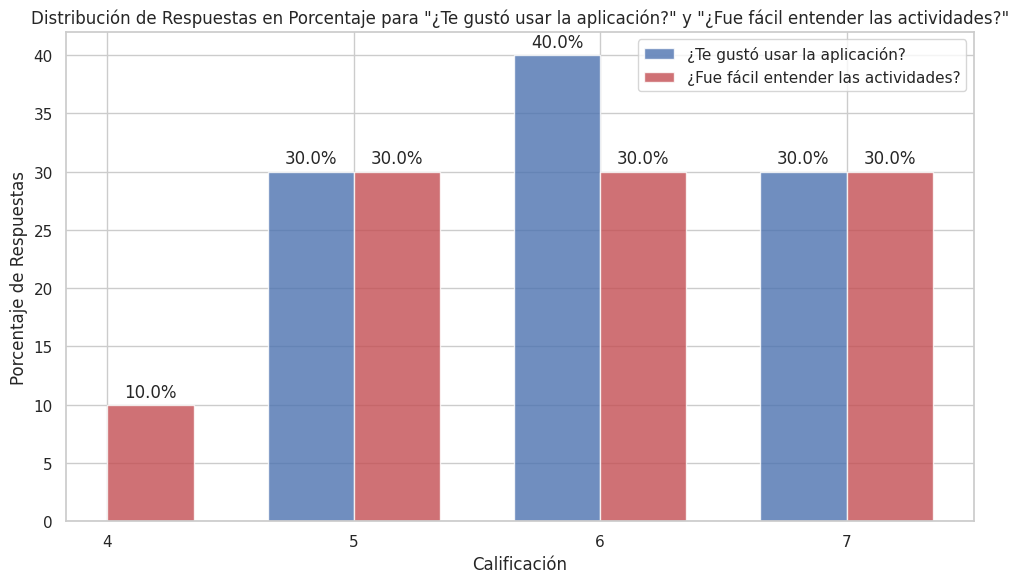

In [ ]:

datos_interes = dax[['¿Te gustó usar la aplicación?', '¿Fue fácil entender las actividades?']]


porcentaje_respuestas = datos_interes.apply(lambda x: (x.value_counts() / len(x)) * 100)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(porcentaje_respuestas))

bar_width = 0.35
opacity = 0.8

bar1 = ax.bar(x, porcentaje_respuestas['¿Te gustó usar la aplicación?'], bar_width,
              alpha=opacity, color='b', label='¿Te gustó usar la aplicación?')

bar2 = ax.bar([p + bar_width for p in x], porcentaje_respuestas['¿Fue fácil entender las actividades?'], bar_width,
              alpha=opacity, color='r', label='¿Fue fácil entender las actividades?')

for rect1, rect2 in zip(bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    ax.annotate('{:.1f}%'.format(height1),
                xy=(rect1.get_x() + rect1.get_width() / 2, height1),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    ax.annotate('{:.1f}%'.format(height2),
                xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Calificación')
ax.set_ylabel('Porcentaje de Respuestas')
ax.set_title('Distribución de Respuestas en Porcentaje para "¿Te gustó usar la aplicación?" y "¿Fue fácil entender las actividades?"')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(porcentaje_respuestas.index)
ax.legend()

plt.tight_layout()
plt.show()
